In [126]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [86]:
data = pd.read_csv("C:/Users/hiept/OneDrive/Desktop/AI Lecture for ITPTIT/ML Algo/Linear regression/fish-market/Fish.csv")

In [87]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [88]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


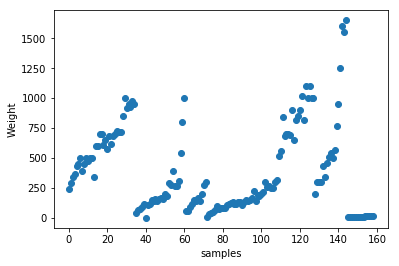

In [89]:
# Kiểm tra phân bố các giá trị của biến target
plt.scatter(y = data['Weight'].values, x = np.arange(0, 159, 1))
plt.ylabel('Weight')
plt.xlabel('samples')
plt.show()

In [107]:
y = data['Weight'].values # Biến phụ thuộc
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values # Biến độc lập

Nhiệm vụ của ta là đoán trọng lượng của con cá dựa vào các thông số còn lại. Với bài này ta thử dùng mô hình Linear Regression xem sao.

In [108]:
# Ta chia dữ liệu làm 2 tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Nhớ một điều là muốn áp dụng Linear Regression thì biến đầu vào và biến đầu ra phải có một mối quan hệ tuyến tính. Ta thử đồ thị ra xem dư lào.

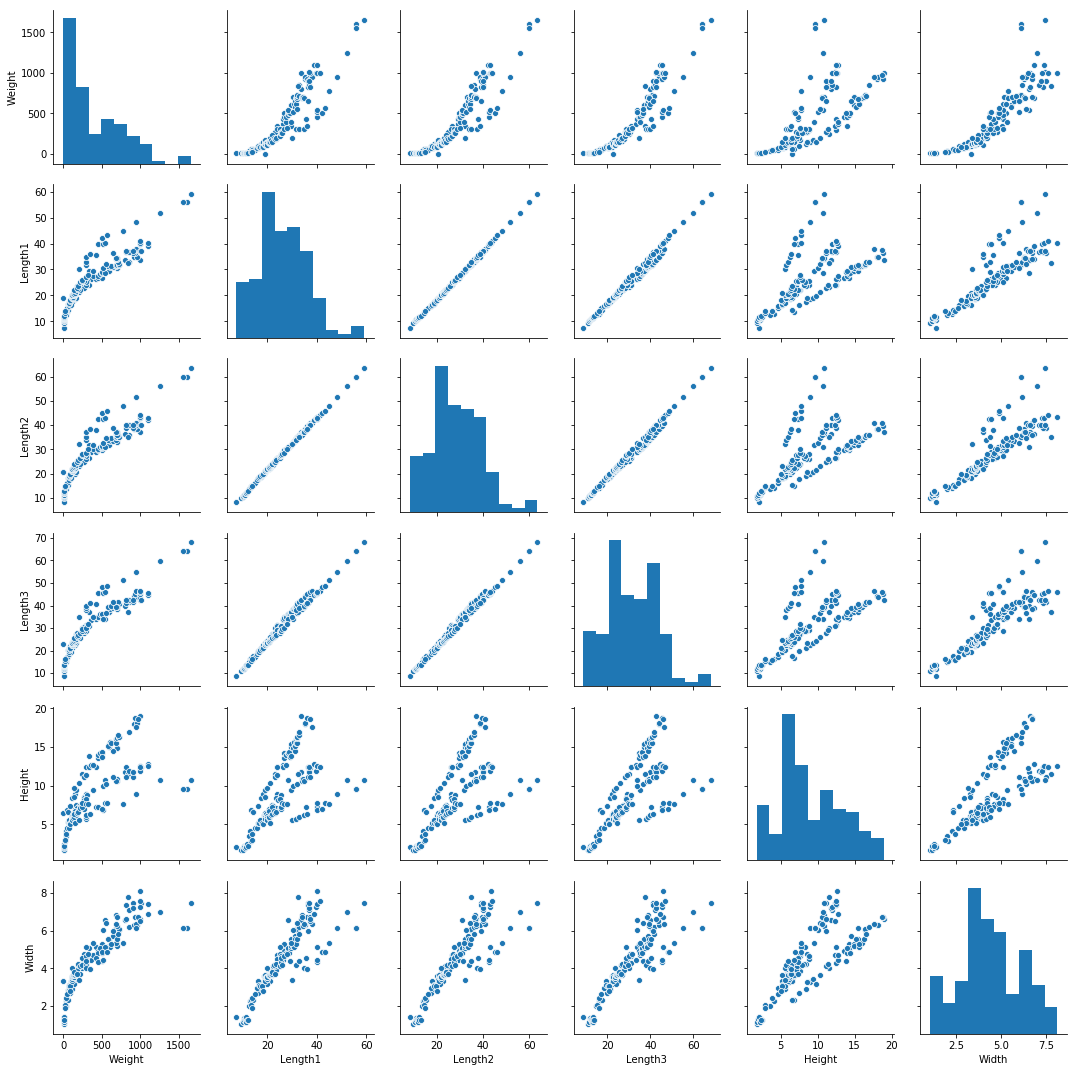

In [112]:
sns.pairplot(data)

In [113]:
corr_mat = data.corr()

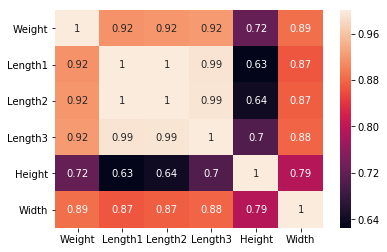

In [114]:
# Ta dùng heatmap để đánh giá độ liên quan giữa các dữ liệu. Dễ thấy ta có Length1, Length2, Length3, Height, Width có sự 
# tương quan với Weight, do đó ta dùng các dữ liệu này để xây dựng mô hình.
sns.heatmap(corr_mat, annot=True)
plt.show()

In [115]:
# Lựa chọn mô hình huấn luyện
model = LinearRegression()

In [116]:
# Thực hiện quá trình huấn luyện
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
# in ra các hệ số và bias
print(model.intercept_)
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df

-446.1173994833806


,Coefficient
0,80.382462
1,-23.913136
2,-31.528084
3,32.210451
4,24.033098


In [101]:
# In ra giá trị biến dự đoán
y_pred = model.predict(X_test)
y_pred

array([ 472.38317189,  161.20821592,  223.58860394,  184.37961353,
        634.2210248 ,  783.03240113,  680.63881667,  503.57500422,
        895.0222029 ,  139.68644481,  356.25875688,  656.72012191,
        778.89520907,  896.40229382,   51.58150919,   92.00766574,
        208.44717103, 1059.59461179,  167.63848938,  682.50393368,
         43.78341609,  497.84924105,  173.23150825, 1164.47228424,
        119.36346106,  515.92438501,  661.67078627,  298.10059021,
        784.8464419 , -147.62147464,  628.37160911,  168.42731311])

In [132]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

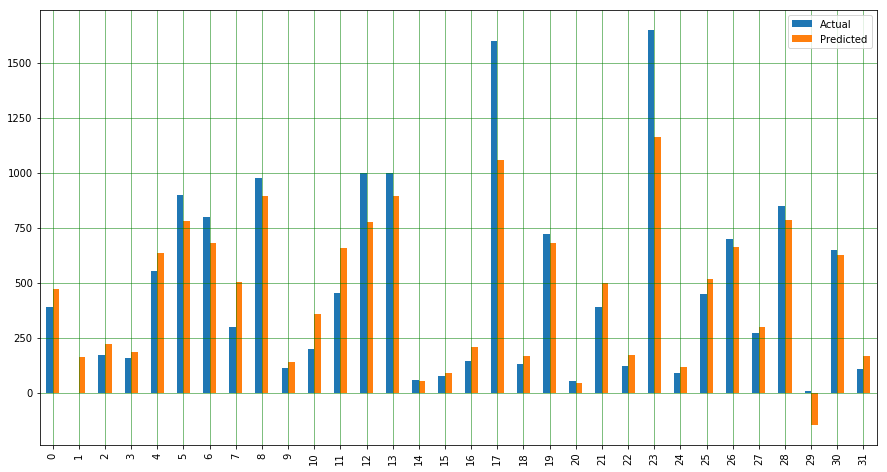

In [140]:
# Tạo biểu đồ so sánh giữa giá trị dự đoán và giá trị thực
df.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [135]:
# Đánh giá:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 107.7973981723483
Mean Squared Error: 26027.71502977769
Root Mean Squared Error: 161.33107273485072


In [ ]:
# Nhận xét: Error vẫn to vcl, thêm nữa ở mẫu dữ liệu 29, ta còn nhận giá trị âm @@

In [ ]:
# Các bạn có thể code tay thuật toán Linear Regression, lên mạng tìm hiểu tiếp nha :>